In [1]:
import pandas as pd
import os
import json

In [4]:
path = "../pulse/data/aggregated/transaction/country/india/state"
Aggr_list_path = os.listdir(path)

In [6]:
clm = {'State':[], 'Year':[],'Quater':[],'Transaction_name':[],'Transacion_type':[], 'Transacion_count':[], 'Transacion_amount':[]}
for i in Aggr_list_path:
    path_i = path + '/' + i
    Aggr_path_i = os.listdir(path_i)
    for j in Aggr_path_i:
        path_j = path_i + '/' + j
        Aggr_path_j = os.listdir(path_j)
        for k in Aggr_path_j :
            path_k = path_j + '/' + k
            Data = open(path_k,'r')
            D = json.load(Data)
            for z in D['data']['transactionData']:
              Name=z['name']
              Type = z['paymentInstruments'][0]['type']
              count=z['paymentInstruments'][0]['count']
              amount=z['paymentInstruments'][0]['amount']
              clm['Transaction_name'].append(Name)
              clm['Transacion_type'].append(Type)
              clm['Transacion_count'].append(count)
              clm['Transacion_amount'].append(amount)
              clm['State'].append(i)
              clm['Year'].append(j)
              clm['Quater'].append(int(k.strip('.json')))
            

In [7]:
Agg_transaction = pd.DataFrame(clm)
Agg_transaction

,State,Year,Quater,Transaction_name,Transacion_type,Transacion_count,Transacion_amount
0,andaman-&-nicobar-islands,2018,1,Recharge & bill payments,TOTAL,4200,1.845307e+06
1,andaman-&-nicobar-islands,2018,1,Peer-to-peer payments,TOTAL,1871,1.213866e+07
2,andaman-&-nicobar-islands,2018,1,Merchant payments,TOTAL,298,4.525072e+05
3,andaman-&-nicobar-islands,2018,1,Financial Services,TOTAL,33,1.060142e+04
4,andaman-&-nicobar-islands,2018,1,Others,TOTAL,256,1.846899e+05
...,...,...,...,...,...,...,...
5029,west-bengal,2024,4,Merchant payments,TOTAL,655100809,3.892862e+11
5030,west-bengal,2024,4,Peer-to-peer payments,TOTAL,493217788,1.361927e+12
5031,west-bengal,2024,4,Recharge & bill payments,TOTAL,76043195,5.753406e+10
5032,west-bengal,2024,4,Financial Services,TOTAL,2352084,8.472965e+08


In [8]:
!pip install --upgrade mysql-connector-python

   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   - -------------------------------------- 0.8/16.4 MB 11.2 MB/s eta 0:00:02
   -- ------------------------------------- 1.0/16.4 MB 7.1 MB/s eta 0:00:03
   ----- ---------------------------------- 2.1/16.4 MB 4.1 MB/s eta 0:00:04
   ------- -------------------------------- 2.9/16.4 MB 4.0 MB/s eta 0:00:04
   -------- ------------------------------- 3.4/16.4 MB 3.5 MB/s eta 0:00:04
   ---------- ----------------------------- 4.2/16.4 MB 3.6 MB/s eta 0:00:04
   ----------- ---------------------------- 4.7/16.4 MB 3.3 MB/s eta 0:00:04
   -------------- ------------------------- 6.0/16.4 MB 3.7 MB/s eta 0:00:03
   ---------------- ----------------------- 6.8/16.4 MB 3.7 MB/s eta 0:00:03
   ------------------ --------------------- 7.6/16.4 MB 3.7 MB/s eta 0:00:03
   -------------------- ------------------- 8.4/16.4 MB 3.7 MB/s eta 0:00:03
   ---------------------- ----------------- 9.2/16.4 MB 3.8 MB/s eta 0:00:02
   --

In [9]:
import mysql.connector

In [10]:
import pymysql

conn_pymysql = pymysql.connect(
    host="localhost",
    user="root",
    password="root123",
)
cursor_pymysql = conn_pymysql.cursor()
print("PyMySQL connection established!")

PyMySQL connection established!


In [11]:
cursor_pymysql.execute("""USE PHONEPE_INSURANCE;""")
cursor_pymysql.execute("""CREATE TABLE agg_Transaction(State varchar(256),Year int,Quater int,Transaction_name varchar(256),Transaction_type varchar(256),Transaction_count bigint unsigned,Transaction_amount bigint);""")
print('Table created!')

Table created!


In [12]:
data_list = Agg_transaction.values.tolist()
query = """
    INSERT INTO agg_Transaction (State,Year,Quater,Transaction_name,Transaction_type,Transaction_count,Transaction_amount)
    VALUES (%s, %s, %s, %s, %s, %s, %s);
"""
cursor_pymysql.executemany(query, data_list)
conn_pymysql.commit()
print("Data inserted using to_list()")

Data inserted using to_list()


In [40]:
cursor_pymysql.execute("""
select state, year, transaction_name,transaction_type, sum(transaction_amount) as total_amount
from agg_Transaction
group by state, year, transaction_name,transaction_type;
""")

result = cursor_pymysql.fetchall()
new_df = pd.DataFrame(result,columns=['state','year','transaction_name','transaction_type','total_amount'])
new_df

,state,year,transaction_name,transaction_type,total_amount
0,andaman-&-nicobar-islands,2018,Recharge & bill payments,TOTAL,13960307
1,andaman-&-nicobar-islands,2018,Peer-to-peer payments,TOTAL,166922819
2,andaman-&-nicobar-islands,2018,Merchant payments,TOTAL,6656386
3,andaman-&-nicobar-islands,2018,Financial Services,TOTAL,209454
4,andaman-&-nicobar-islands,2018,Others,TOTAL,1327138
...,...,...,...,...,...
1255,west-bengal,2024,Merchant payments,TOTAL,1317308068265
1256,west-bengal,2024,Peer-to-peer payments,TOTAL,4853465966319
1257,west-bengal,2024,Recharge & bill payments,TOTAL,211680346405
1258,west-bengal,2024,Financial Services,TOTAL,2877472101


In [60]:
import matplotlib.pyplot as plt
import numpy as np
filtered_df = new_df[new_df['state'] == 'maharashtra']
filtered_df['total_amount'] = pd.to_numeric(filtered_df['total_amount'], errors='coerce')
filtered_df

C:\Users\aravi\AppData\Local\Temp\ipykernel_9060\2774470766.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['total_amount'] = pd.to_numeric(filtered_df['total_amount'], errors='coerce')


,state,year,transaction_name,transaction_type,total_amount
700,maharashtra,2018,Recharge & bill payments,TOTAL,1.641772e+10
701,maharashtra,2018,Peer-to-peer payments,TOTAL,1.635073e+11
702,maharashtra,2018,Merchant payments,TOTAL,7.490502e+09
703,maharashtra,2018,Financial Services,TOTAL,2.762377e+08
704,maharashtra,2018,Others,TOTAL,2.156694e+09
705,maharashtra,2019,Peer-to-peer payments,TOTAL,6.209310e+11
706,maharashtra,2019,Recharge & bill payments,TOTAL,5.372010e+10
707,maharashtra,2019,Merchant payments,TOTAL,5.965676e+10
708,maharashtra,2019,Financial Services,TOTAL,1.985107e+08
709,maharashtra,2019,Others,TOTAL,2.820743e+09


In [ ]:

# Step 2: Group by year and transaction_name
pivot_df = filtered_df.pivot(index='year', columns='transaction_name', values='total_amount')
pivot_df



transaction_name,Financial Services,Merchant payments,Others,Peer-to-peer payments,Recharge & bill payments
year,,,,,
2018,2.762377e+08,7.490502e+09,2.156694e+09,1.635073e+11,1.641772e+10
2019,1.985107e+08,5.965676e+10,2.820743e+09,6.209310e+11,5.372010e+10
2020,1.055167e+09,2.320351e+11,1.760567e+09,1.339778e+12,1.041886e+11
2021,2.315883e+09,8.025718e+11,3.392631e+09,3.319796e+12,1.915416e+11
2022,2.507794e+09,1.703621e+12,3.761102e+09,5.833276e+12,3.025554e+11
2023,4.035383e+09,2.401720e+12,3.519324e+09,7.936758e+12,4.724447e+11
2024,8.004597e+09,3.470448e+12,4.009038e+09,1.071749e+13,5.844321e+11


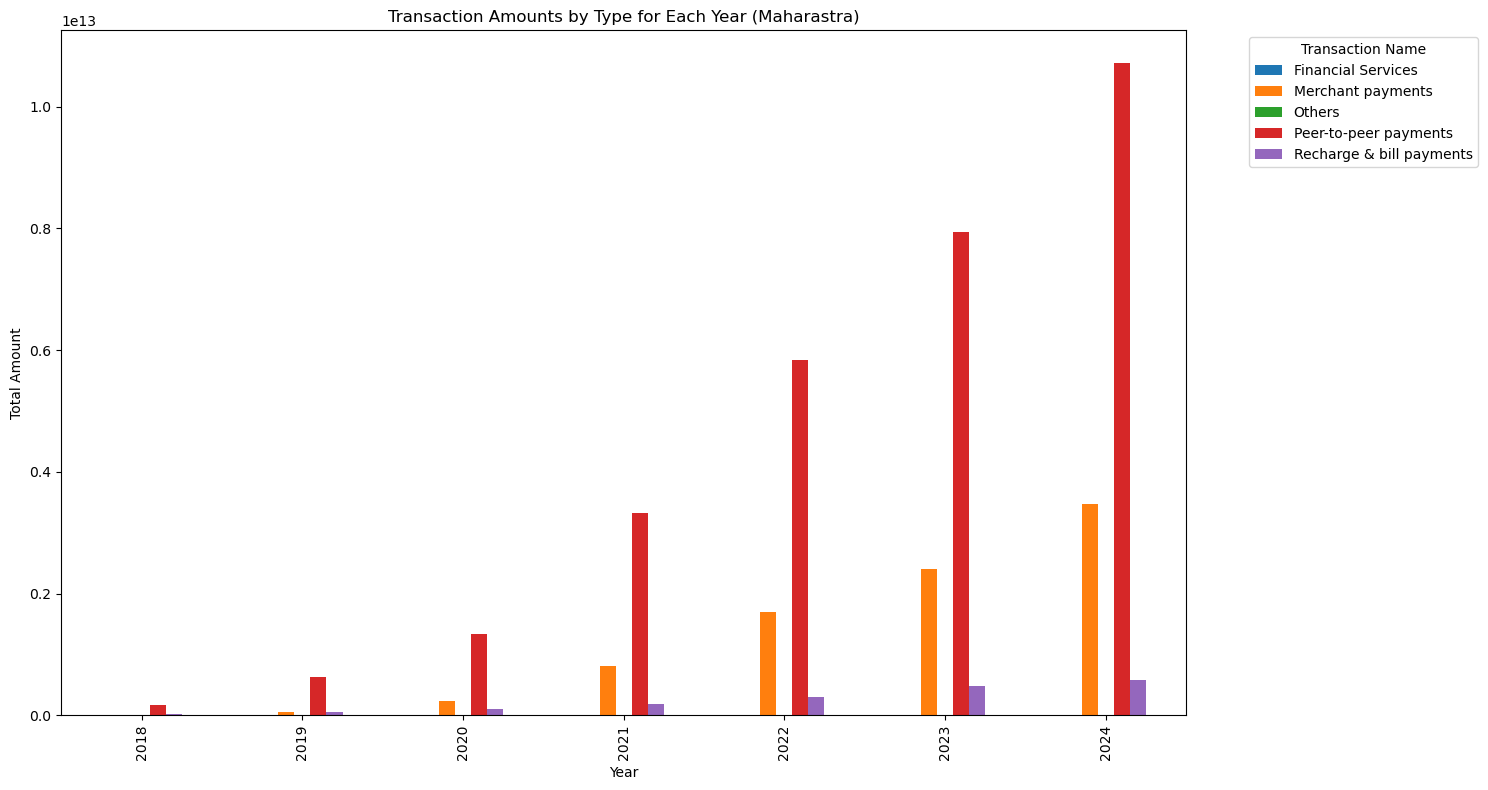

In [62]:
pivot_df.plot(kind='bar', figsize=(15, 8))

plt.title('Transaction Amounts by Type for Each Year (Maharastra)')
plt.xlabel('Year')
plt.ylabel('Total Amount')
plt.legend(title='Transaction Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()